In [1]:
import time
import math
from typing import Union

import torch
import numpy as np
from scipy import stats
from scipy.spatial.transform import Rotation
from skimage import measure, morphology, transform, feature, color, draw
import matplotlib.pyplot as plt

import rospy
import ros_numpy
from sensor_msgs.msg import Image, CameraInfo
from geometry_msgs.msg import Point, Quaternion

from grcnn.msg import GraspCandidate
from grcnn.srv import PredictGrasps, PredictGraspsResponse
from grasp import Grasp
from gr_convnet import GRConvNet
from type import *

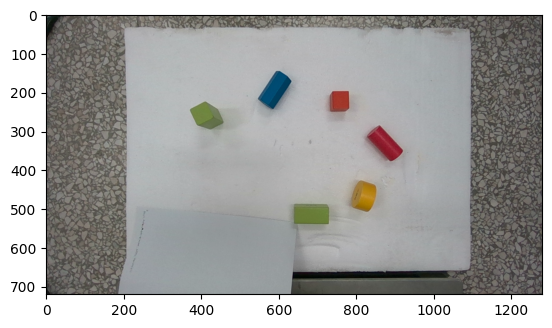

In [12]:
rgb=np.load("rgb_raw.npy")
plt.imshow(rgb)

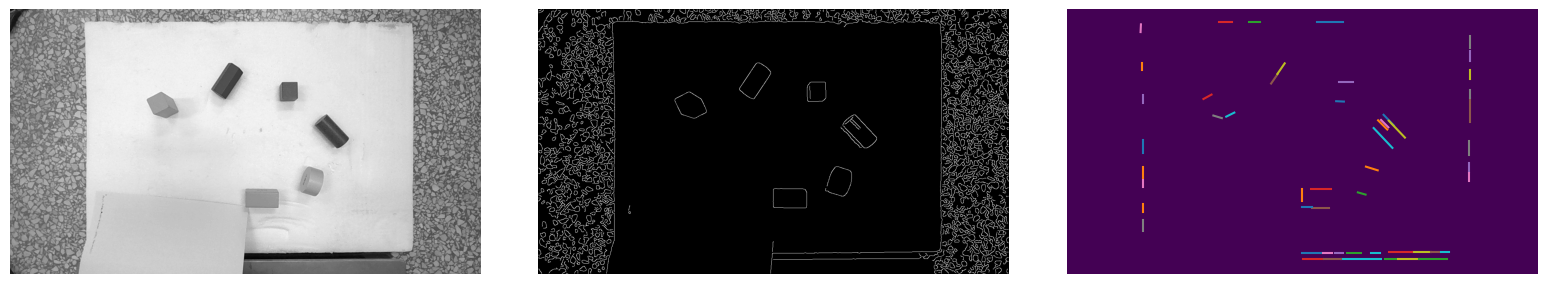

In [26]:
import skimage.transform as st
import matplotlib.pyplot as plt
from skimage import data,feature

#使用Probabilistic Hough Transform.
image = color.rgb2gray(rgb)
edges = feature.canny(image, sigma=2)
# edges = feature.canny(image, sigma=3,low_threshold=0,high_threshold=0.1)
lines = st.probabilistic_hough_line(edges, threshold=20, line_length=20,line_gap=0)

# 创建显示窗口
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))
plt.tight_layout()

#显示原图像
ax0.imshow(image, plt.cm.gray)
# ax0.imshow(rgb)
ax0.set_axis_off()

#显示canny边缘
ax1.imshow(edges, plt.cm.gray)
ax1.set_axis_off()

#用plot绘制出所有的直线
ax2.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))
row2, col2 = image.shape
ax2.axis((0, col2, row2, 0))
ax2.set_axis_off()
plt.show()